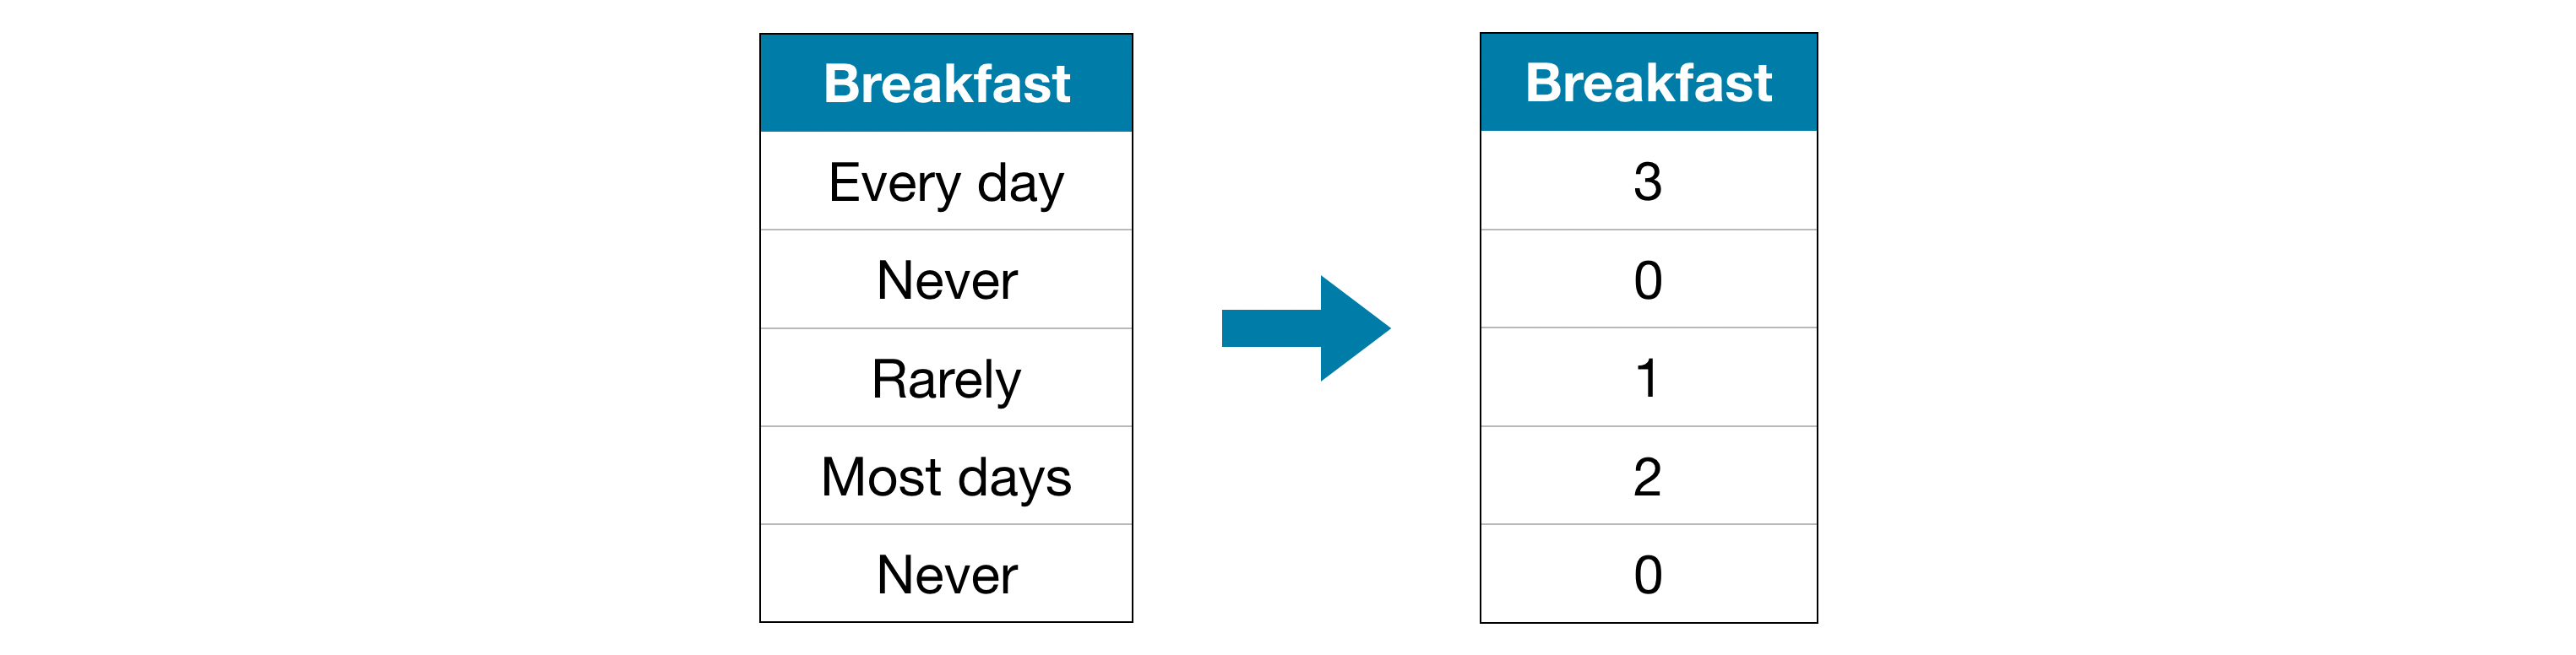

In [35]:
from IPython.display import Image
from sklearn.metrics import mean_absolute_error
#Label encoding
Image("label.png")

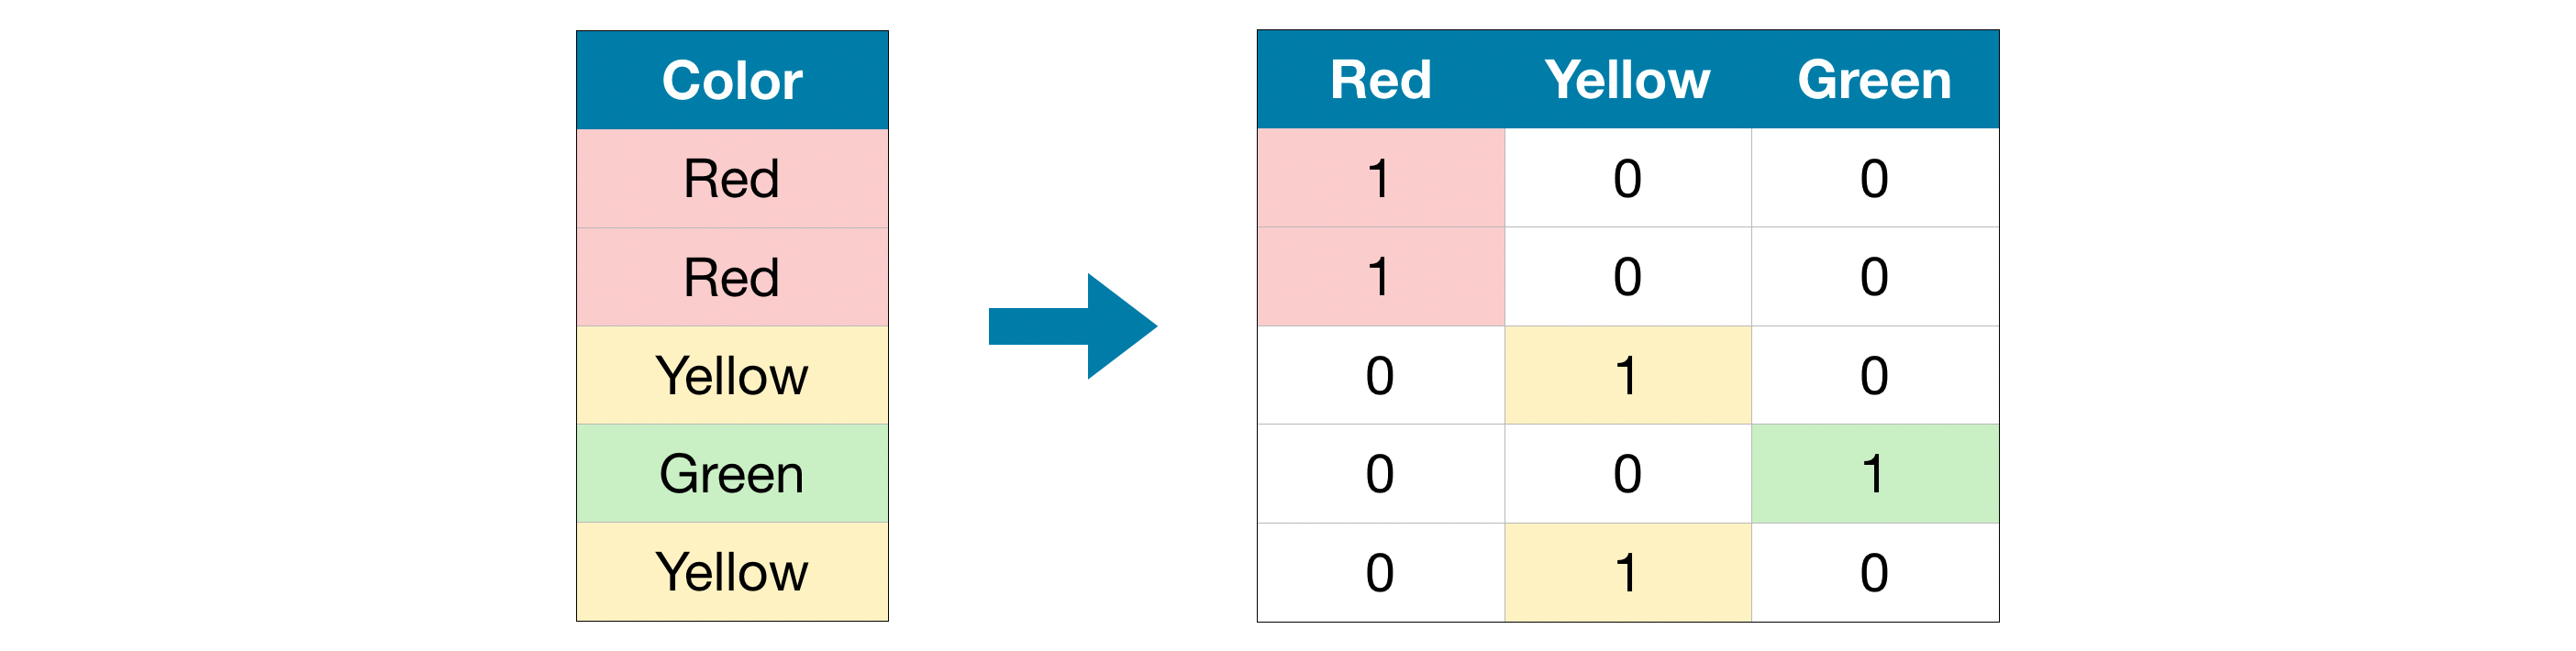

In [4]:
#Onehot encoding
Image("onehot.png")

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
avocados=pd.read_csv("avocado.csv")
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
avocados.columns

all_cols=['AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region']

In [33]:
X=avocados[all_cols]
y=avocados.AveragePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

kol = (X_train.dtypes == 'object')
word_cols = list(kol[kol].index)

print("Categorical variables:")
print(word_cols)

Categorical variables:
['type', 'region']


In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in word_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_test)

preds[0:10]

/home/kknopp/env/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/kknopp/env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([0.82  , 0.97  , 1.44  , 0.97  , 1.45  , 1.29  , 2.03  , 0.94  ,
       2.4499, 1.83  ])

In [38]:
y_test[0:10]

8604     0.82
2608     0.97
14581    1.44
4254     0.97
16588    1.45
13954    1.29
17460    2.03
5504     0.94
17253    2.45
7801     1.83
Name: AveragePrice, dtype: float64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
